## Plotting of cross-section graphs

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, max_error, r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import scipy.stats as stats

import plotting

In [2]:
use_liberation_fonts = True
if use_liberation_fonts:
    plt.rcParams.update({
        'font.family':'sans-serif',
        'font.sans-serif':['Liberation Sans'],
    })

In [3]:
# import CROSS-SECTION (cs) ASV
cs_asv = pd.read_csv('../data/output/nuorgam_cs_3_asv.csv', delimiter=',')

In [4]:
# import CROSS-SECTION (cs) ALS
cs_als = pd.read_csv('../data/output/nuorgam_cs_3_als.csv', delimiter=',')

In [5]:
# import CROSS-SECTION (cs) S2
cs_s2 = pd.read_csv('../data/output/nuorgam_cs_3_s2.csv', delimiter=',')

In [6]:
# check
cs_asv

,ASV_m,ASV
0,0.000000,NaN
1,0.287220,NaN
2,0.574441,NaN
3,0.861661,NaN
4,1.148881,NaN
...,...,...
860,247.009494,NaN
861,247.296714,NaN
862,247.583935,NaN
863,247.871155,NaN


In [7]:
# check
cs_als

,ALS_m,ALS
0,0.000000,13.480963
1,0.287220,13.480414
2,0.574441,13.479113
3,0.861661,13.478677
4,1.148881,13.489906
...,...,...
860,247.009494,11.971139
861,247.296714,12.022099
862,247.583935,12.111342
863,247.871155,12.193409


In [8]:
# check
cs_s2

,S2_m,S2
0,0.000000,18.009235
1,1.152889,18.009235
2,2.305778,18.009235
3,3.458667,18.009235
4,4.611556,16.002894
...,...,...
212,244.412488,12.104497
213,245.565377,14.352107
214,246.718266,14.352107
215,247.871155,14.352107


In [9]:
# rename S2 to SDB
cs_s2 = cs_s2.rename(columns={"S2": "SDB"})

In [10]:
# replace "None" to nan
cs_asv = cs_asv.replace('None', np.nan)
cs_als = cs_als.replace('None', np.nan)
cs_s2 = cs_s2.replace('None', np.nan)

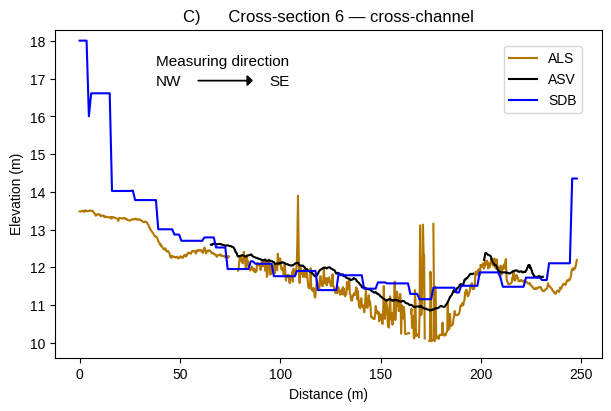

In [15]:
# plot
fig, ax = plotting.init_plot(figsize=(6,4))
ax.set_title('C)      Cross-section 6 — cross-channel')

cs_als.plot(x='ALS_m', color = '#B37700', linestyle="solid", ax=ax)
cs_asv.plot(x='ASV_m', color='black',  linestyle="solid", ax=ax)
cs_s2.plot(x='S2_m', color = '#0000FF', linestyle="solid", ax=ax)
ax.set_xlabel("Distance (m)")
ax.set_ylabel("Elevation (m)")
#ax.axis('equal')
ax.set_ylim(9.6,18.3) # 9.6,18.3 for Nuorgam, 56,67.5 for Utsjoki
leg = ax.get_legend()
leg.set_bbox_to_anchor((0.977, 0.971)) # 0.977, 0.971 for Nuorgam, 0.177, 0.271 for Utsjoki
fig.text(0.25, 0.85, 'Measuring direction', fontsize=11)
fig.text(0.25, 0.80, 'NW', fontsize=11) # start point of the compass 
fig.text(0.44, 0.80, 'SE', fontsize=11) # end point of the compass
ax.arrow(59, 16.95, 27, 0, 
         length_includes_head=True, head_width=0.25, head_length=2.5, 
         color='black'
        )

In [16]:
# save as png
plotting.save_plot(fig=fig, name='nuorgam_cs_6_v3', dpi=600)